In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
#import warnings
#warnings.filterwarnings("ignore")

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/MTH/NSL_KDD_Train.csv'
file_path2 = '/content/drive/MyDrive/MTH/NSL_KDD_Test.csv'
#df = pd.read_csv(file_path)
#df = pd.read_csv(file_path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Naming each column
col_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

In [ ]:
# Assigning attribute name to dataset
dataset_train = pd.read_csv(file_path, header=None, names = col_names)
dataset_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [ ]:
dataset_test = pd.read_csv(file_path2, header=None, names = col_names)
dataset_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [ ]:
#label distribution of Training set and testing set
print('Label distribution Training set:')
print(dataset_train['label'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

In [ ]:
#Identify categorical features
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object' :
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


In [ ]:
# Check for missing values
print(dataset_train.isnull())

# No missing values found, so no further action needed


        duration  protocol_type  service   flag  src_bytes  dst_bytes   land  \
0          False          False    False  False      False      False  False   
1          False          False    False  False      False      False  False   
2          False          False    False  False      False      False  False   
3          False          False    False  False      False      False  False   
4          False          False    False  False      False      False  False   
...          ...            ...      ...    ...        ...        ...    ...   
125968     False          False    False  False      False      False  False   
125969     False          False    False  False      False      False  False   
125970     False          False    False  False      False      False  False   
125971     False          False    False  False      False      False  False   
125972     False          False    False  False      False      False  False   

        wrong_fragment  urgent    hot  

In [ ]:
# Step 1: Identify Missing Values
#missing_values = df.isnull().sum()

# Step 2: Check if there are any missing values
#if missing_values.sum() == 0:
 #   print("No missing values found in the dataset.")
#else:
#    print("Missing values found in the dataset. Imputation will be performed.")

    # Step 3: Decide on a Strategy
    # For this example, let's assume we'll impute missing values with the mean for numerical columns
    # and with the mode for categorical columns.

    # Numerical columns
 #   numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
    # Impute missing values in numerical columns with the mean
 #   df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

    # Categorical columns
   # categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
    # Impute missing values in categorical columns with the mode
#    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    # Step 4: Verify if missing values have been handled
  #  missing_values_after_imputation = df.isnull().sum()
  #  print("\nMissing values after imputation:")
#   print(missing_values_after_imputation)


# **LabelEncoder**

In [ ]:
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [ ]:
dataset_train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


# **Dummy Columns**

In [ ]:
# protocol type
unique_protocol=sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(dataset_train.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

Transform categorical features into numbers using LabelEncoder()

In [ ]:
#Transform categorical features into numbers using LabelEncoder()
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())
# test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


# **One-Hot-Encoding**

In [ ]:
#One-Hot-Encoding¶
enc = OneHotEncoder()
dataset_train_categorical_values_encenc = enc.fit_transform(dataset_train_categorical_values_enc)
dataset_train_cat_data = pd.DataFrame(dataset_train_categorical_values_encenc.toarray(),columns=dumcols)
# test set
dataset_test_categorical_values_encenc = enc.fit_transform(dataset_test_categorical_values_enc)
dataset_test_cat_data = pd.DataFrame(dataset_test_categorical_values_encenc.toarray(),columns=testdumcols)

In [ ]:
dataset_train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Add 6 missing categories from train set to test set

In [ ]:
trainservice=dataset_train['service'].tolist()
testservice= dataset_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_urh_i',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i']

In [ ]:
for col in difference:
    dataset_test_cat_data[col] = 0

dataset_test_cat_data.shape

(22544, 84)

# Join encoded categorical dataframe with the non-categorical dataframe

In [ ]:
#Join encoded categorical dataframe with the non-categorical dataframe
newdf=dataset_train.join(dataset_train_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=dataset_test.join(dataset_test_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


# Split Dataset into 4 datasets for every attack category
Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.
Replace labels column with new labels column
 Make new datasets

In [ ]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column

newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [ ]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


# Feature Scaling:

In [ ]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',axis=1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',axis=1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',axis=1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',axis=1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',axis=1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',axis=1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',axis=1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',axis=1)
Y_U2R_test = U2R_df_test.label

Save a list of feature names for later use (it is the same for every attack category). Column names are dropped at this stage.

In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

Use StandardScaler() to scale the dataframes

In [ ]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R)
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

# Step 3: Feature Selection:
 Univariate Feature Selection using ANOVA F-test

In [ ]:
#univariate feature selection with ANOVA F-test. using secondPercentile method, then RFE
#Scikit-learn exposes feature selection routines as objects that implement the transform method
#SelectPercentile: removes all but a user-specified highest scoring percentage of features
#f_classif: ANOVA F-value between label/feature for classification tasks.
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS,Y_DoS)
X_newDoS.shape

(113270, 13)

Get the features that were selected: DoS

In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'flag_S0',
 'flag_SF']

In [ ]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe.shape

(78999, 13)

Get the features that were selected: Probe

In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'Protocol_type_icmp',
 'service_eco_i',
 'service_private',
 'flag_SF']

In [ ]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L.shape


(68338, 13)

Get the features that were selected: R2L

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['src_bytes',
 'dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp',
 'service_ftp_data',
 'service_http',
 'service_imap4',
 'flag_RSTO']

In [ ]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R.shape

(67395, 13)

Get the features that were selected: U2R

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'service_ftp_data',
 'service_http',
 'service_telnet']

Summary of features selected by Univariate Feature Selection

In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_

In [ ]:
selector_DoS = SelectPercentile(f_classif, percentile=10)
X_newDoS = selector_DoS.fit_transform(X_DoS, Y_DoS)

selector_Probe = SelectPercentile(f_classif, percentile=10)
X_newProbe = selector_Probe.fit_transform(X_Probe, Y_Probe)

selector_R2L = SelectPercentile(f_classif, percentile=10)
X_newR2L = selector_R2L.fit_transform(X_R2L, Y_R2L)

selector_U2R = SelectPercentile(f_classif, percentile=10)
X_newU2R = selector_U2R.fit_transform(X_U2R, Y_U2R)

# Step 2: Split Data
X_trainDoS, X_testDoS, y_trainDoS, y_testDoS = train_test_split(X_newDoS, Y_DoS, test_size=0.2, random_state=42)
X_trainProbe, X_testProbe, y_trainProbe, y_testProbe = train_test_split(X_newProbe, Y_Probe, test_size=0.2, random_state=42)
X_trainR2L, X_testR2L, y_trainR2L, y_testR2L = train_test_split(X_newR2L, Y_R2L, test_size=0.2, random_state=42)
X_trainU2R, X_testU2R, y_trainU2R, y_testU2R = train_test_split(X_newU2R, Y_U2R, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifier
clf_DoS = DecisionTreeClassifier()
clf_Probe = DecisionTreeClassifier()
clf_R2L = DecisionTreeClassifier()
clf_U2R = DecisionTreeClassifier()

# Train the classifiers
clf_DoS.fit(X_newDoS, Y_DoS)
clf_Probe.fit(X_newProbe, Y_Probe)
clf_R2L.fit(X_newR2L, Y_R2L)
clf_U2R.fit(X_newU2R, Y_U2R)


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

# Predictions
Y_DoS_pred = clf_DoS.predict(X_newDoS)
Y_Probe_pred = clf_Probe.predict(X_newProbe)
Y_R2L_pred = clf_R2L.predict(X_newR2L)
Y_U2R_pred = clf_U2R.predict(X_newU2R)

# Classification report
print("Classification Report for DoS:")
print(classification_report(Y_DoS, Y_DoS_pred))

print("Classification Report for Probe:")
print(classification_report(Y_Probe, Y_Probe_pred))

print("Classification Report for R2L:")
print(classification_report(Y_R2L, Y_R2L_pred))

print("Classification Report for U2R:")
print(classification_report(Y_U2R, Y_U2R_pred))

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     67343
           1       1.00      0.98      0.99     45927

    accuracy                           0.99    113270
   macro avg       0.99      0.99      0.99    113270
weighted avg       0.99      0.99      0.99    113270

Classification Report for Probe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           2       1.00      1.00      1.00     11656

    accuracy                           1.00     78999
   macro avg       1.00      1.00      1.00     78999
weighted avg       1.00      1.00      1.00     78999

Classification Report for R2L:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           3       1.00      1.00      1.00       995

    accuracy                           1.00     68338
   macro avg       1.00      1.00

In [ ]:
# Transform test data using the same scaler
X_DoS_test=scaler1.transform(X_DoS_test)
X_Probe_test=scaler2.transform(X_Probe_test)
X_R2L_test=scaler3.transform(X_R2L_test)
X_U2R_test=scaler4.transform(X_U2R_test)

# Select relevant features
X_test_newDoS = X_DoS_test[:, newcolindex_DoS]
X_test_newProbe = X_Probe_test[:, newcolindex_Probe]
X_test_newR2L = X_R2L_test[:, newcolindex_R2L]
X_test_newU2R = X_U2R_test[:, newcolindex_U2R]

# Predictions on test data
Y_DoS_test_pred = clf_DoS.predict(X_test_newDoS)
Y_Probe_test_pred = clf_Probe.predict(X_test_newProbe)
Y_R2L_test_pred = clf_R2L.predict(X_test_newR2L)
Y_U2R_test_pred = clf_U2R.predict(X_test_newU2R)

# Classification report on test data
print("Classification Report for DoS (Test Data):")
print(classification_report(Y_DoS_test, Y_DoS_test_pred))

print("Classification Report for Probe (Test Data):")
print(classification_report(Y_Probe_test, Y_Probe_test_pred))

print("Classification Report for R2L (Test Data):")
print(classification_report(Y_R2L_test, Y_R2L_test_pred))

print("Classification Report for U2R (Test Data):")
print(classification_report(Y_U2R_test, Y_U2R_test_pred))


Classification Report for DoS (Test Data):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      9711
           1       1.00      0.24      0.38      7460

    accuracy                           0.67     17171
   macro avg       0.81      0.62      0.58     17171
weighted avg       0.79      0.67      0.60     17171

Classification Report for Probe (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      9711
           2       0.58      0.55      0.56      2421

    accuracy                           0.83     12132
   macro avg       0.73      0.72      0.73     12132
weighted avg       0.83      0.83      0.83     12132

Classification Report for R2L (Test Data):
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      9711
           3       0.91      0.18      0.30      2885

    accuracy                           0.81     125

In [ ]:
# all features
#clf_DoS=DecisionTreeClassifier(random_state=0)
#clf_Probe=DecisionTreeClassifier(random_state=0)
#clf_R2L=DecisionTreeClassifier(random_state=0)
#clf_U2R=DecisionTreeClassifier(random_state=0)
#clf_DoS.fit(X_DoS, Y_DoS.astype(int))
#clf_Probe.fit(X_Probe, Y_Probe.astype(int))
#clf_R2L.fit(X_R2L, Y_R2L.astype(int))
#clf_U2R.fit(X_U2R, Y_U2R.astype(int))

In [ ]:
# Step 1: Preprocessing and Feature Selection
import pandas as pd
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

# Load dataset and perform preprocessing (omitted for brevity)
# Perform feature selection using ANOVA F-test
selector = SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS, Y_DoS)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_newDoS, Y_DoS, test_size=0.2, random_state=42)

# Step 3: Train the Model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Evaluate Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Interpretation and Tuning
# Perform model tuning if necessary (omitted for brevity)



Accuracy: 0.9843294782378388
Precision: 0.9843828214800141
Recall: 0.9843294782378388
F1 Score: 0.9843096596976998
Confusion Matrix:
[[13201   101]
 [  254  9098]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to train and evaluate a decision tree classifier
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    # Train the classifier
    clf.fit(X_train, Y_train)
    # Predict the labels
    Y_pred = clf.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    return accuracy

# Feature selection for test data using the same selector as for training data
X_newDoS_test = selector.transform(X_DoS_test)

# Train and evaluate Decision Tree for DoS attacks
accuracy_DoS = train_and_evaluate(X_newDoS, Y_DoS, X_newDoS_test, Y_DoS_test)
print("The accuracy for DoS attacks is approximately {:.2f}%.".format(accuracy_DoS * 100))

# Feature selection for test data using the same selector as for training data
X_newProbe_test = selector.transform(X_Probe_test)

# Train and evaluate Decision Tree for Probe attacks
accuracy_Probe = train_and_evaluate(X_newProbe, Y_Probe, X_newProbe_test, Y_Probe_test)
print("The accuracy for Probe attacks is approximately {:.2f}%.".format(accuracy_Probe * 100))

# Train and evaluate Decision Tree for R2L attacks
accuracy_R2L = train_and_evaluate(X_R2L, Y_R2L, X_R2L_test, Y_R2L_test)
print("The accuracy for R2L attacks is approximately {:.2f}%.".format(accuracy_R2L * 100))

# Train and evaluate Decision Tree for U2R attacks
accuracy_U2R = train_and_evaluate(X_U2R, Y_U2R, X_U2R_test, Y_U2R_test)
print("The accuracy for U2R attacks is approximately {:.2f}%.".format(accuracy_U2R * 100))


The accuracy for DoS attacks is approximately 65.23%.
The accuracy for Probe attacks is approximately 20.48%.
The accuracy for R2L attacks is approximately 81.87%.
The accuracy for U2R attacks is approximately 99.37%.


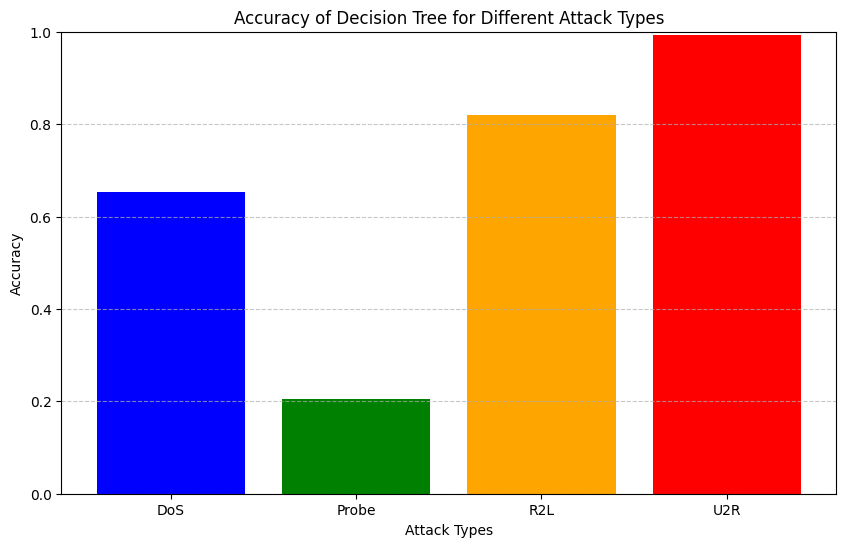

In [ ]:

# Accuracy values
accuracies = [accuracy_DoS, accuracy_Probe, accuracy_R2L, accuracy_U2R]
attack_types = ['DoS', 'Probe', 'R2L', 'U2R']

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(attack_types, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy of Decision Tree for Different Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


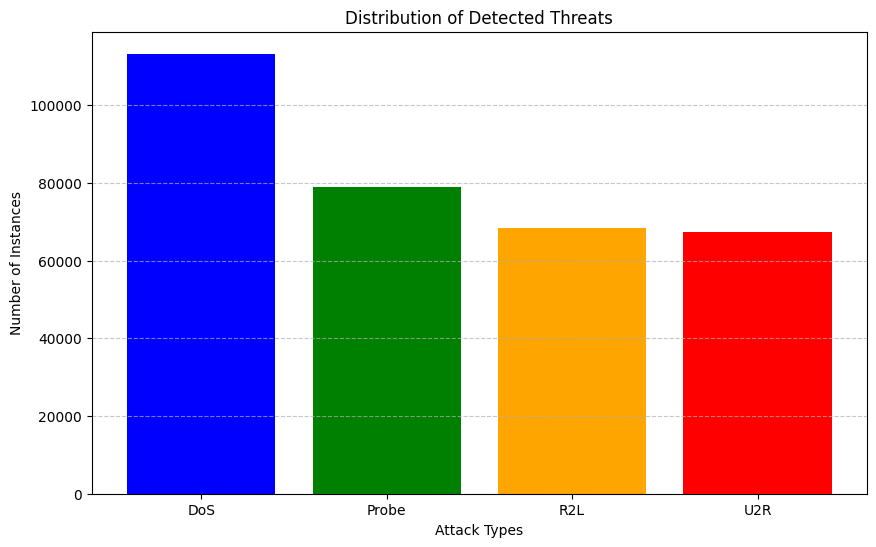

Implications for Cybersecurity:
- Denial of Service (DoS) attacks are the most common, aimed at rendering a computer or network unavailable to users.
- Probe attacks involve scanning and probing for vulnerabilities in a system, potentially leading to unauthorized access.
- Remote-to-Local (R2L) attacks occur when an attacker gains unauthorized access to a system from a remote location.
- User-to-Root (U2R) attacks involve escalating privileges to gain root access, indicating a serious security breach.


In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store the counts of each attack type
attack_counts = {
    "DoS": len(DoS_df),
    "Probe": len(Probe_df),
    "R2L": len(R2L_df),
    "U2R": len(U2R_df)
}

# Plotting the counts of each attack type
plt.figure(figsize=(10, 6))
plt.bar(attack_counts.keys(), attack_counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Distribution of Detected Threats')
plt.xlabel('Attack Types')
plt.ylabel('Number of Instances')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print implications for cybersecurity
print("Implications for Cybersecurity:")
print("- Denial of Service (DoS) attacks are the most common, aimed at rendering a computer or network unavailable to users.")
print("- Probe attacks involve scanning and probing for vulnerabilities in a system, potentially leading to unauthorized access.")
print("- Remote-to-Local (R2L) attacks occur when an attacker gains unauthorized access to a system from a remote location.")
print("- User-to-Root (U2R) attacks involve escalating privileges to gain root access, indicating a serious security breach.")
